In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [4]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset3/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 8790 images belonging to 2 classes.
Found 1120 images belonging to 2 classes.


In [5]:
train_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [6]:
validation_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [8]:
validation_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load the VGG-16 model with pretrained weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG-16 base layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    vgg16_base,                          
    GlobalAveragePooling2D(),            
    Dropout(0.2),                        
    Dense(2, activation='softmax')      
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10


C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


275/275 ━━━━━━━━━━━━━━━━━━━━ 1904s 7s/step - accuracy: 0.5662 - loss: 0.6976 - precision: 0.5940 - recall: 0.2420 - val_accuracy: 0.6187 - val_loss: 0.6262 - val_precision: 0.8714 - val_recall: 0.2179
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1886s 7s/step - accuracy: 0.6576 - loss: 0.6157 - precision: 0.7410 - recall: 0.2960 - val_accuracy: 0.6562 - val_loss: 0.5970 - val_precision: 0.8716 - val_recall: 0.2848
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1728s 6s/step - accuracy: 0.6845 - loss: 0.5937 - precision: 0.7667 - recall: 0.3554 - val_accuracy: 0.6545 - val_loss: 0.5883 - val_precision: 0.8504 - val_recall: 0.3196
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1926s 7s/step - accuracy: 0.7048 - loss: 0.5692 - precision: 0.7928 - recall: 0.3861 - val_accuracy: 0.6536 - val_loss: 0.5835 - val_precision: 0.8553 - val_recall: 0.3482
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1856s 7s/step - accuracy: 0.6967 - loss: 0.5704 - precision: 0.7890 - recall: 0.4087 - val_accuracy: 0.6679 - val_loss: 0.5

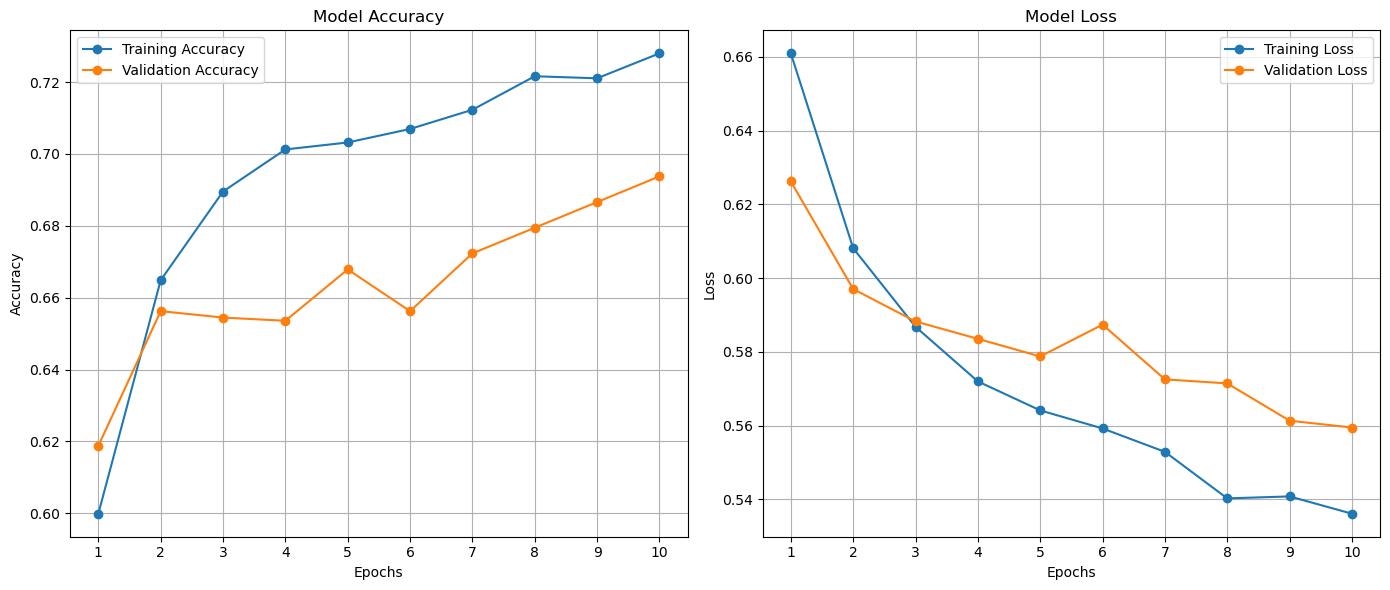

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16_2\training_plot.png


In [10]:
import matplotlib.pyplot as plt
import os
import csv

# Extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)

csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16_2"
os.makedirs(output_dir, exist_ok=True)

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset3/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 1130 images belonging to 2 classes.


In [15]:
import tensorflow as tf
import numpy as np

# Print Model Summary
model.summary()

# Count Trainable and Non-Trainable Parameters
trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
non_trainable_params = np.sum([tf.keras.backend.count_params(w) for w in model.non_trainable_weights])

# Print Details
print("\n================ MODEL DETAILS ================")
print(f"Total Parameters: {trainable_params + non_trainable_params}")
print(f"Trainable Parameters: {trainable_params}")
print(f"Non-Trainable Parameters: {non_trainable_params}")
print(f"Number of Layers: {len(model.layers)}")
print("\n===============================================")

# Print Layer-wise Trainable Status
print("\nLayer-wise Trainability:")
for layer in model.layers:
    print(f"{layer.name}: Trainable = {layer.trainable}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,717,768 (56.14 MB)

 Trainable params: 1,026 (4.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2,054 (8.03 KB)


================ MODEL DETAILS ================
Total Parameters: 14715714
Trainable Parameters: 1026
Non-Trainable Parameters: 14714688
Number of Layers: 4


Layer-wise Trainability:
vgg16: Trainable = True
global_average_pooling2d: Trainable = True
dropout: Trainable = True
dense: Trainable = True


In [17]:
# Evaluate model on test dataset
test_results = model.evaluate(test_dataset)

# Extract values
test_loss = test_results[0]   # Test loss
test_acc = test_results[1]    # Test accuracy
test_precision = test_results[2]  # Test precision
test_recall = test_results[3]     # Test recall

# Print results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


36/36 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7471 - loss: 0.5154 - precision: 0.8901 - recall: 0.4202
Test Loss: 0.5423
Test Accuracy: 0.7305
Test Precision: 0.7305
Test Recall: 0.6800
